In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from lm import global_live_lm, estimate_iterations, generate_theta0, live_data, logL_model
from test_samples import gaussian_samples, correlated_gaussian_samples, wedding_cake_samples

In [5]:
# Load samples
samples = correlated_gaussian_samples()
logL = samples.logL
logX = samples.logX()
X = np.exp(logX)
from anesthetic import read_chains
plik_root = '../../plikHM_TTTEEE_lowl_lowE_lensing_NS/NS_plikHM_TTTEEE_lowl_lowE_lensing'
samples_plik = read_chains(root=plik_root)

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/samples.py:971: RuntimeWarning: 7 out of 60705 samples have logL <= logL_birth,
7 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.


In [12]:
samples_plik.gui()

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [11]:
%matplotlib

Using matplotlib backend: TkAgg


### Running estimates for samples_g

In [21]:
samples_g = gaussian_samples(1000, 20, 0.05)
iterations_g = np.arange(500, 20000, 1000)
logLmax_g, d_g, sigma_g = run_estimate(samples_g, global_live_method, iterations_g, (generate_theta0, 10))

/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


500


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0 [-9.85482957 18.8605871   0.05119457] 45.09243710183272
1 [-9.85481982 18.86058833  0.05119457] 45.0924371018296
2 [-9.8548297  18.86058709  0.05119457] 45.09243710183306
3 [-9.85482734 18.86058738  0.05119457] 45.09243710183132
4 [-9.85483661 18.86058621  0.05119457] 45.09243710183995
5 [-9.85482415 18.86058778  0.05119457] 45.092437101830285
6 [-9.85483186 18.86058681  0.05119457] 45.0924371018346
7 [-9.85481726 18.86058865  0.05119457] 45.092437101829965
8 [-9.85481828 18.86058852  0.05119457] 45.092437101829894
9 [-9.85481264 18.86058923  0.05119457] 45.09243710183189
1500
0 [11.17992006 22.05203636  0.04879764] 13.532230494561158
1 [11.17991734 22.05203598  0.04879764] 13.532230494561963
2 [11.17992468 22.05203701  0.04879764] 13.532230494560418
3 [11.17991462 22.0520356   0.04879764] 13.532230494563283
4 [11.1799125  22.0520353   0.04879764] 13.532230494564299
5 [11.17993414 22.05203835  0.04879764] 13.532230494562201
6 [11.17993884 22.052039    0.04879764] 13.532230494564432
7

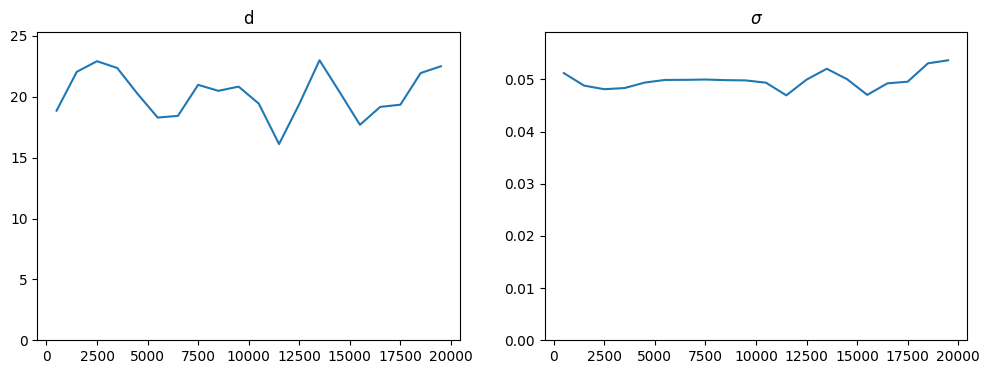

In [22]:
plot_estimates(iterations_g, d_g, sigma_g)

### samples_w

In [7]:
samples_w = wedding_cake_samples(1000, 10, 0.01)

In [8]:
iterations_w = np.arange(500, 8000, 200)
logLmax_w, d_w, sigma_w = run_estimate(samples_w, global_live_method, iterations_w, (generate_theta0, 5))

500
0 [1.74668519e+02 5.90527374e+00 1.82166449e-02] 1064841.2667389964
1 [-683.97689393    6.92912674  833.85938737] 13437883.906870047


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2 [1.74683726e+02 5.90540413e+00 1.82165891e-02] 1064841.2668893128
3 [1.74668448e+02 5.90527315e+00 1.82166452e-02] 1064841.2667395377
4 [1.74668808e+02 5.90527624e+00 1.82166439e-02] 1064841.2667368061
700
0 [1.07910290e+02 5.74805942e+00 1.93554205e-02] 457384.7278618736
1 [-4.81943480e+02  2.17295169e+00  4.17131906e+03] 6059139.233556766
2 [1.07906845e+02 5.74801850e+00 1.93554232e-02] 457384.727837562
3 [1.07905742e+02 5.74800539e+00 1.93554241e-02] 457384.72783419857
4 [1.07900387e+02 5.74794172e+00 1.93554283e-02] 457384.72784837877
900
0 [1.34084879e+02 6.99999998e+00 2.09822697e-02] 234090.43334655606
1 [1.34084876e+02 6.99999996e+00 2.09822698e-02] 234090.43334819275
2 [1.34084880e+02 7.00000000e+00 2.09822697e-02] 234090.43334521828
3 [1.34084878e+02 7.00000000e+00 2.09822698e-02] 234090.43334524863
4 [1.34084878e+02 6.99999999e+00 2.09822698e-02] 234090.43334586694
1100
0 [8.96665338e+01 7.00000000e+00 2.26648527e-02] 122235.0820928084
1 [8.96665337e+01 7.00000000e+00 2.26

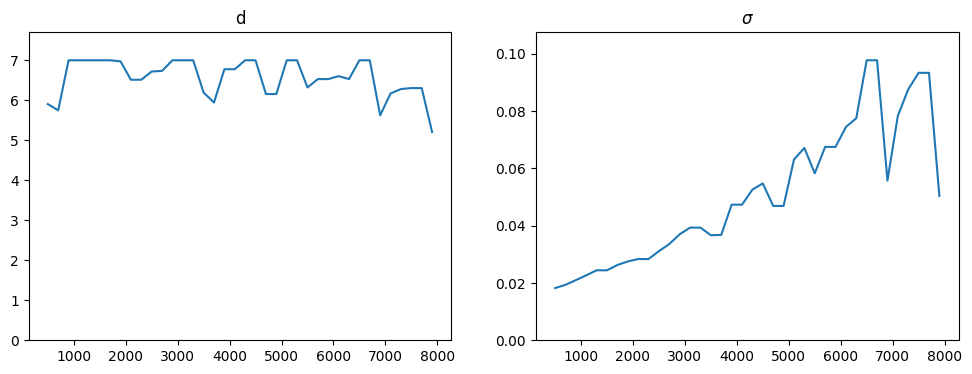

In [9]:
plot_estimates(iterations_w, d_w, sigma_w)

### Running estimates for samples_plik

In [13]:
# Run Levenberg-Marquardt at 10 points across plik run, for 5 different initial conditions at each point
iterations = np.arange(5000, 50000, 5000)
logLmax, d, sigma = run_estimate(samples_plik, global_live_method, iterations, (generate_theta0, 10))

5000


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0 [-1.91426995e+04  1.35818189e+00  1.85550650e-03] 2209412180.9803514
1 [-1.91426943e+04  1.35818242e+00  1.85550686e-03] 2209412180.911053
2 [-1.91426931e+04  1.35818254e+00  1.85550694e-03] 2209412180.898864
3 [-1.91426874e+04  1.35818313e+00  1.85550734e-03] 2209412180.8555875
4 [-1.91427067e+04  1.35818116e+00  1.85550601e-03] 2209412181.1127634
5 [-1.91426856e+04  1.35818331e+00  1.85550746e-03] 2209412180.8479686
6 [-1.91426861e+04  1.35818326e+00  1.85550743e-03] 2209412180.849757
7 [-1.91426985e+04  1.35818199e+00  1.85550657e-03] 2209412180.9652014
8 [-1.91426847e+04  1.35818341e+00  1.85550753e-03] 2209412180.8448496
9 [-1.91427005e+04  1.35818179e+00  1.85550644e-03] 2209412180.9950676
10000
0 [-1.33343983e+04  4.20752552e+00  4.01383318e-03] 1480113.6900448094
1 [-1.33343998e+04  4.20752360e+00  4.01383213e-03] 1480113.69006066
2 [-1.33343996e+04  4.20752389e+00  4.01383229e-03] 1480113.6900565585
3 [-1.33343983e+04  4.20752546e+00  4.01383314e-03] 1480113.6900449109
4 [-1

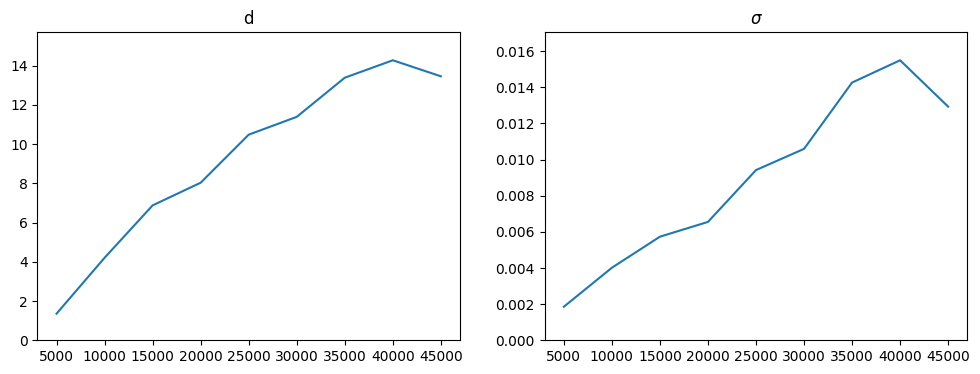

In [14]:
# Plot estimated d, sigma for plik data
plot_estimates(iterations, d, sigma)

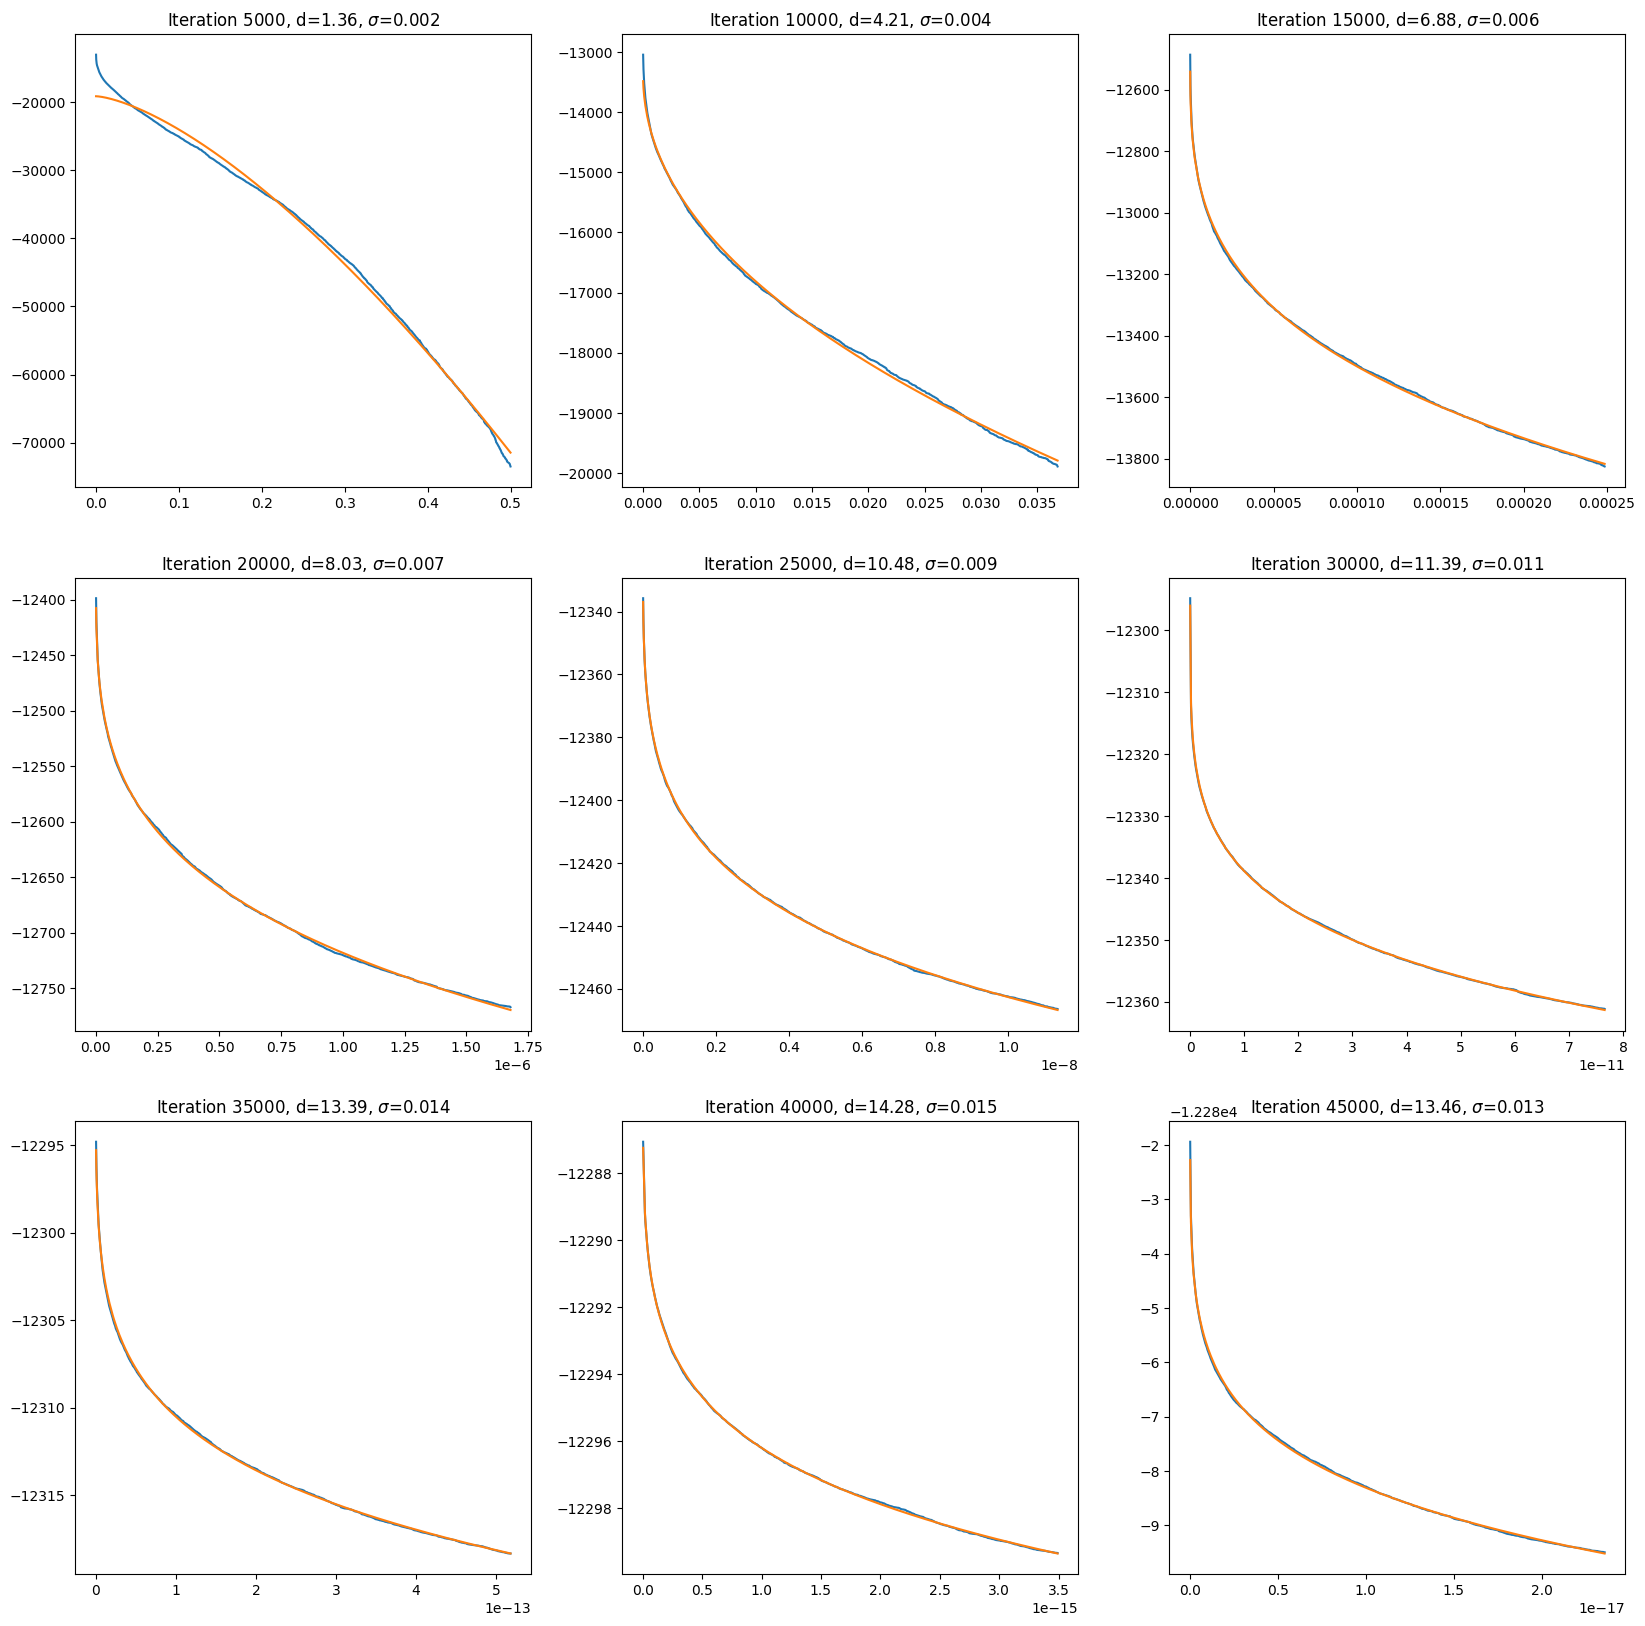

In [16]:
# Plot how well the estimated d, sigma fit at each point
iterations = np.arange(5000, 50000, 5000)
if len(iterations) % 3 == 0:
    rows = int(len(iterations)/3)
else:
    rows = int(len(iterations)/3) + 1
fig, axs = plt.subplots(rows, 3, figsize=(20,20))
axs = axs.flatten()
for i, iteration in enumerate(iterations):
    logLdata, Xdata = live_data(samples_plik, iteration)
    axs[i].plot(Xdata, logLdata, label='real')
    axs[i].plot(Xdata, logL_model((logLmax[i], d[i], sigma[i]), Xdata), label='model')
    axs[i].set_title(f"Iteration {iteration}, d={d[i]:.2f}, $\sigma$={sigma[i]:.3f}")

### Testing initial condition generators

10000


/home/zixiao/Documents/III/aeons/venv/lib/python3.10/site-packages/anesthetic-2.0.0b12-py3.10.egg/anesthetic/labelled_pandas.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append(f(*args))


0 [-1.33343975e+04  4.20752655e+00  4.01383374e-03] 1480113.6900471048
1 [-1.33343991e+04  4.20752447e+00  4.01383261e-03] 1480113.6900502513
2 [-1.33343985e+04  4.20752525e+00  4.01383303e-03] 1480113.6900454727
3 [-1.33343985e+04  4.20752529e+00  4.01383305e-03] 1480113.6900453304
4 [-1.33344008e+04  4.20752234e+00  4.01383145e-03] 1480113.690085434
5 [-1.33343985e+04  4.20752524e+00  4.01383302e-03] 1480113.690045501
6 [-1.33343983e+04  4.20752550e+00  4.01383317e-03] 1480113.690044837
7 [-1.33343988e+04  4.20752487e+00  4.01383282e-03] 1480113.6900472378
8 [-1.33343989e+04  4.20752479e+00  4.01383278e-03] 1480113.6900477882
9 [-1.33343984e+04  4.20752545e+00  4.01383314e-03] 1480113.6900449367


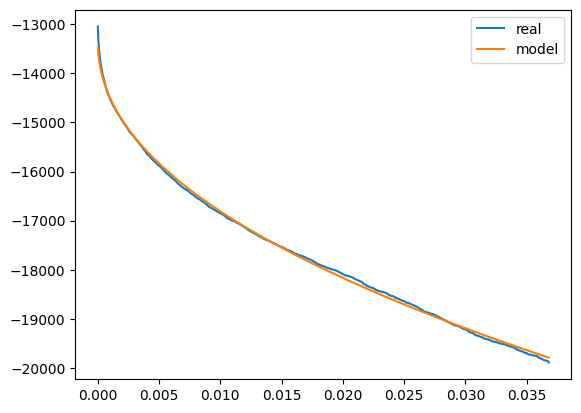

In [134]:
def generator1(i):
    return [-10000, 1+i, 0.01+i*0.1]
iteration = 10000
theta = global_live_method(samples_plik, iteration, generator1, 10).x
logLdata, Xdata = live_data(samples_plik, iteration)
plt.plot(Xdata, logLdata, label='real')
plt.plot(Xdata, logL_model(theta, Xdata), label='model')
plt.legend()

0 [-1.27425059e+04  5.59218711e+00  4.91705031e-03] 274495.3954693031
1 [-1.27425060e+04  5.59218687e+00  4.91705016e-03] 274495.39546939376
2 [-1.27425068e+04  5.59218422e+00  4.91704855e-03] 274495.39547249454
3 [-1.27425059e+04  5.59218725e+00  4.91705039e-03] 274495.39546926407
4 [-1.27425064e+04  5.59218563e+00  4.91704941e-03] 274495.39547037083
5 [-1.27425059e+04  5.59218718e+00  4.91705035e-03] 274495.3954692814
6 [-1.27425059e+04  5.59218699e+00  4.91705024e-03] 274495.39546934364
7 [-1.27425058e+04  5.59218730e+00  4.91705042e-03] 274495.3954692514
8 [-1.27425059e+04  5.59218699e+00  4.91705023e-03] 274495.3954693444
9 [-1.27425062e+04  5.59218601e+00  4.91704964e-03] 274495.39546997903


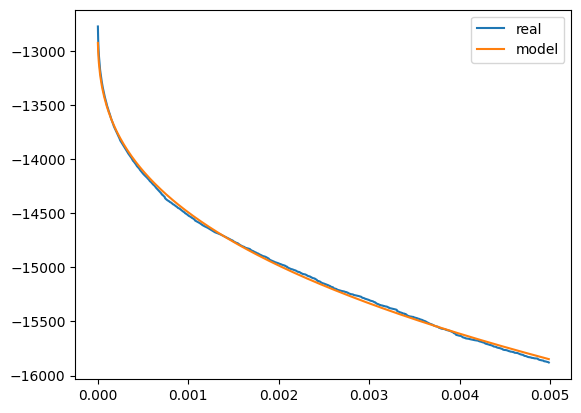

In [107]:
iteration = 12000
min_cost = np.inf
min_solution = None
for i in range(10):
    solution = local_live_estimate(samples_plik, iteration, [-10000, 1+i*2, 0.01+i*0.2])
    if solution.cost < min_cost:
        min_cost = solution.cost
        min_solution = solution
    print(i, solution.x, solution.cost)
theta = solution.x

logLdata, Xdata = live_data(samples_plik, iteration)
plt.plot(Xdata, logLdata, label='real')
plt.plot(Xdata, logL_model(theta, Xdata), label='model')
plt.legend()

Around 1s per starting point, each check takes around 10 seconds